In [11]:
using Pkg
Pkg.activate("/Users/ryansenne/Documents/GitHub/SSM")

  Activating project at `\Users\ryansenne\Documents\GitHub\SSM`


In [12]:
include("/Users/ryansenne/Documents/Github/SSM/SSM/SSM.jl")
using .SSM
using LinearAlgebra
using Distributions
using Random
using Plots

In [13]:
Random.seed!(3)
N = 500  # Number of data points
D = 2    # Number of dimensions
K = 2

# Create synthetic data from two Gaussians
μ1, μ2 = [-5,  -5], [-4, -2.5]
Σ1, Σ2 = [1.0 0.1; 0.1 1.0], [1.0 -0.8; -0.8 1.0]

data1 = rand(MvNormal(μ1, Σ1), N ÷ 2)
data2 = rand(MvNormal(μ2, Σ2), N ÷ 2)

# Concatenate to form a single dataset
data = transpose(hcat(data1, data2))
data = copy(data)

gmm = SSM.GMM(K, D, data)
SSM.log_likelihood(gmm, data)

-1791.6461112883894

In [14]:
SSM.fit!(gmm, data, tol=1e-100)

Iteration: 1, Log-likelihood: -1633.86082868836
Iteration: 2, Log-likelihood: -1613.745327085371
Iteration: 3, Log-likelihood: -1597.0785589310372
Iteration: 4, Log-likelihood: -1586.8314337835004
Iteration: 5, Log-likelihood: -1582.5352965263253
Iteration: 6, Log-likelihood: -1580.5809583305677
Iteration: 7, Log-likelihood: -1579.6703800107953
Iteration: 8, Log-likelihood: -1579.2535092714018
Iteration: 9, Log-likelihood: -1579.062460136059
Iteration: 10, Log-likelihood: -1578.9737930489646
Iteration: 11, Log-likelihood: -1578.9320542408834
Iteration: 12, Log-likelihood: -1578.9121691837045
Iteration: 13, Log-likelihood: -1578.9026080240722
Iteration: 14, Log-likelihood: -1578.8979795196535
Iteration: 15, Log-likelihood: -1578.895727859117
Iteration: 16, Log-likelihood: -1578.8946286133396


Iteration: 17, Log-likelihood: -1578.8940906141763
Iteration: 18, Log-likelihood: -1578.89382682607
Iteration: 19, Log-likelihood: -1578.893697316576
Iteration: 20, Log-likelihood: -1578.8936336697702
Iteration: 21, Log-likelihood: -1578.8936023665483
Iteration: 22, Log-likelihood: -1578.8935869605505
Iteration: 23, Log-likelihood: -1578.8935793736193
Iteration: 24, Log-likelihood: -1578.893575634761
Iteration: 25, Log-likelihood: -1578.8935737907316
Iteration: 26, Log-likelihood: -1578.8935728802855
Iteration: 27, Log-likelihood: -1578.8935724301368
Iteration: 28, Log-likelihood: -1578.8935722071374
Iteration: 29, Log-likelihood: -1578.8935720963666
Iteration: 30, Log-likelihood: -1578.8935720411343
Iteration: 31, Log-likelihood: -1578.8935720134523
Iteration: 32, Log-likelihood: -1578.8935719994793
Iteration: 33, Log-likelihood: -1578.893571992358
Iteration: 34, Log-likelihood: -1578.8935719886829
Iteration: 35, Log-likelihood: -1578.8935719867493
Iteration: 36, Log-likelihood: -1578

Iteration: 38, Log-likelihood: -1578.8935719848268
Iteration: 39, Log-likelihood: -1578.8935719846388
Iteration: 40, Log-likelihood: -1578.8935719845276
Iteration: 41, Log-likelihood: -1578.8935719844576
Iteration: 42, Log-likelihood: -1578.893571984413
Iteration: 43, Log-likelihood: -1578.8935719843848
Iteration: 44, Log-likelihood: -1578.8935719843664
Iteration: 45, Log-likelihood: -1578.8935719843541
Iteration: 46, Log-likelihood: -1578.8935719843416
Iteration: 47, Log-likelihood: -1578.8935719843357


Iteration: 48, Log-likelihood: -1578.893571984333
Iteration: 49, Log-likelihood: -1578.8935719843305
Iteration: 50, Log-likelihood: -1578.8935719843303


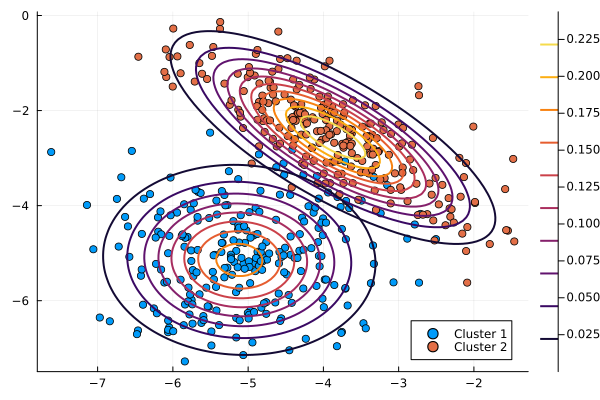

In [15]:
scatter(data[1:250, 1], data[1:250, 2], label="Cluster 1", legend=:bottomright)
scatter!(data[251:500, 1], data[251:500, 2], label="Cluster 2")

# Define a function to evaluate the multivariate Gaussian
function evaluate_mvg(x, y, μ, Σ)
    pos = [x, y]
    return pdf(MvNormal(μ, Σ), pos)
end

# Generate a grid for the contour
xmin, xmax = extrema(data[:, 1])
ymin, ymax = extrema(data[:, 2])
xrange = range(xmin, stop=xmax, length=100)
yrange = range(ymin, stop=ymax, length=100)

# Plot each Gaussian in the GMM
for k in 1:gmm.k_means
    Z = [evaluate_mvg(x, y, gmm.μ_k[:, k], gmm.Σ_k[k]) for x in xrange, y in yrange]
    contour!(xrange, yrange, Z', levels=10, linewidth=2, label="Gaussian $k")
end

# Show the plot
plot!()

In [214]:
A = [0.2 0.95; 0.8 0.05]
μ1 = [1.0, 0.2]
μ2 = [5.1, -1.3]
Σ1 = [2 1.63; 1.63 4.2]
Σ2 = [1 -0.3 -0.3 1]
B = [SSM.GaussianEmission(μ1, Σ1), SSM.GaussianEmission(μ2, Σ2)]
π_k = [0.6, 0.4]

2-element Vector{Main.SSM.GaussianEmission}:
 Main.SSM.GaussianEmission([1.0, 0.2], [2.0 1.63; 1.63 4.2])
 Main.SSM.GaussianEmission([5.1, -1.3], [1.0 -0.3 -0.3 1.0])